=== E-Library Dashboard ===


Enter CSV file path:  C:\Users\kajal\Downloads\library_transactions.csv


Dataset loaded successfully!

==== STATISTICS ====
Top 5 Most Borrowed Books:
Book Title
Harry Potter and the Sorcerer's Stone    15
1984                                     13
To Kill a Mockingbird                    12
A Brief History of Time                  12
The Alchemist                            11
Name: count, dtype: int64

Average Borrowing Duration: 14.15
Busiest Borrowing Day: 2024-04-15

Filtered Results:
Empty DataFrame
Columns: [Transaction ID, Date, User ID, Book Title, Genre, Borrowing Duration (Days)]
Index: []


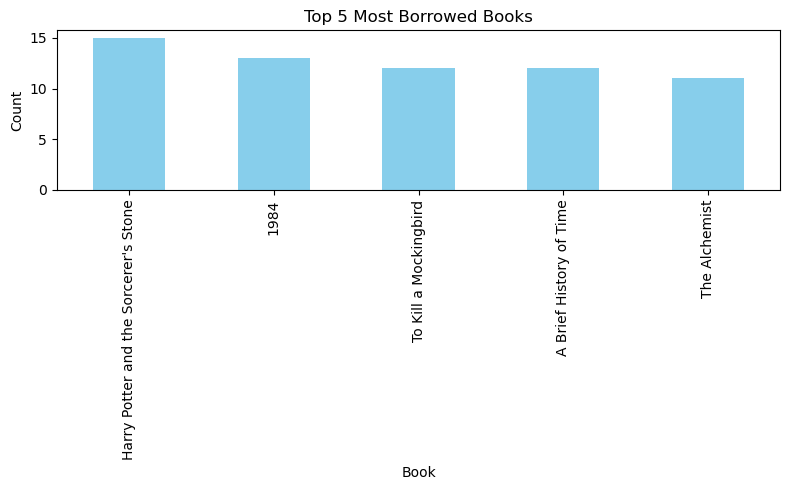

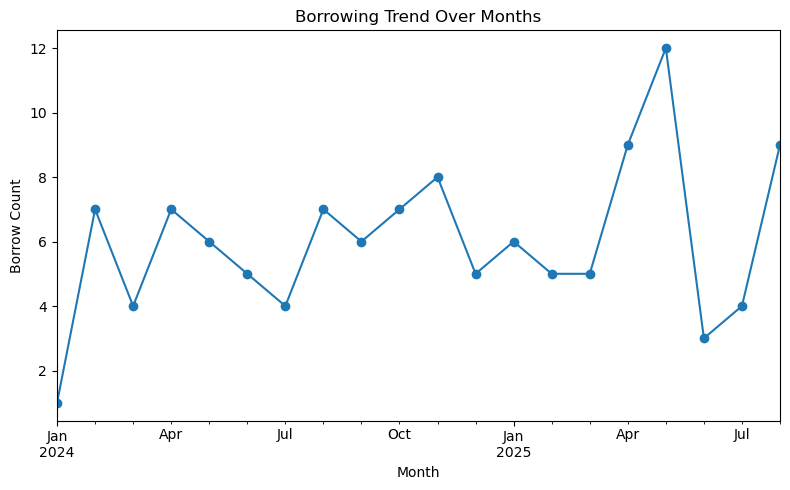

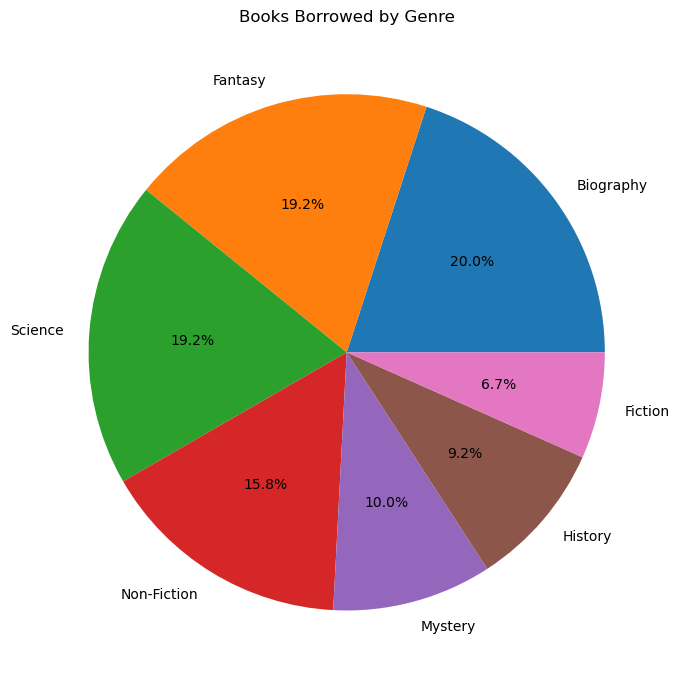

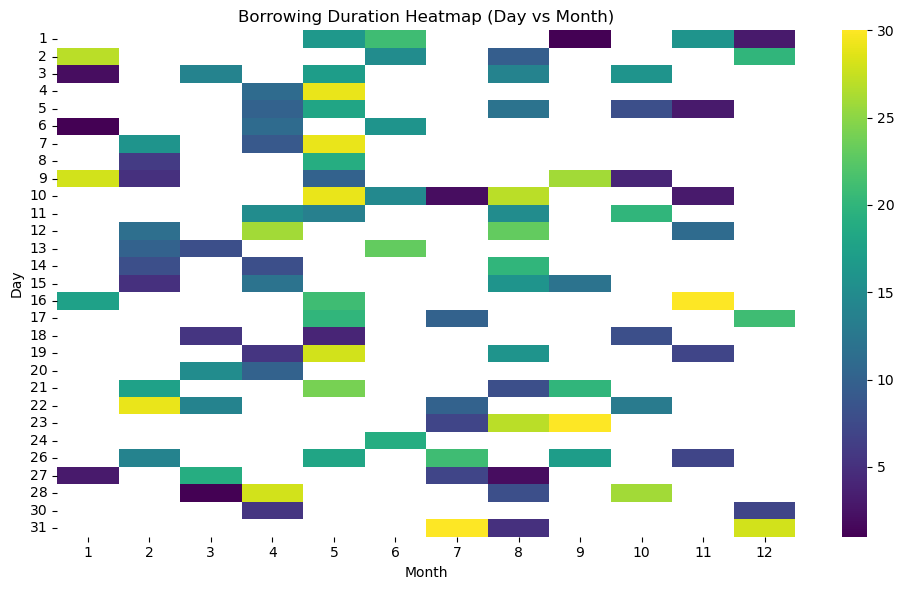

C:\Users\kajal\AppData\Local\Temp\ipykernel_3368\4288813662.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Genre", data=self.df, palette="Set2")


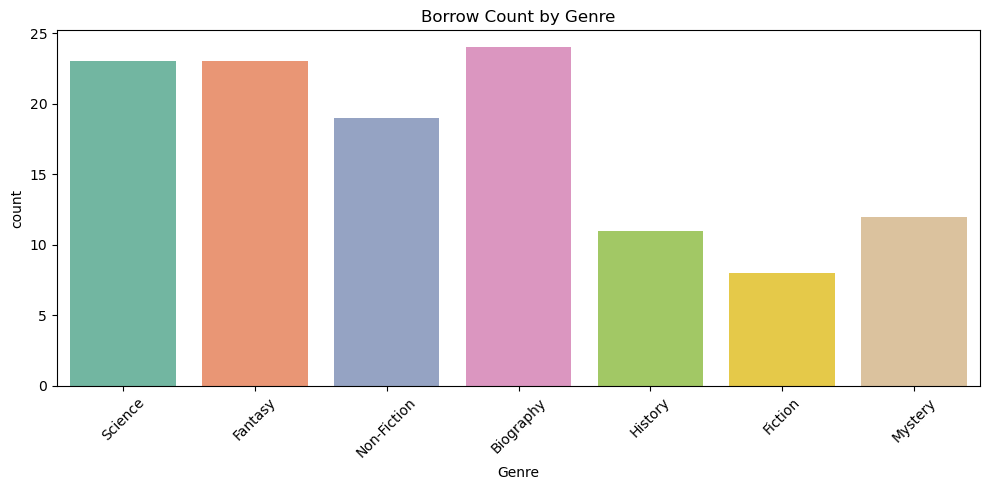

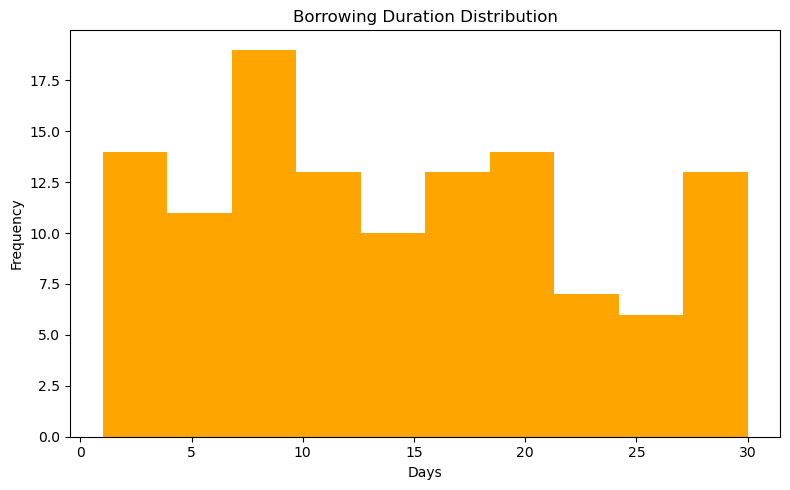

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class LibraryDashboard:
    def __init__(self):
        self.df = None

   
    def load_data(self, file_path):
        try:
            self.df = pd.read_csv(file_path)

            if self.df.isnull().sum().sum() > 0:
                print("Warning: Missing values found. Filling with defaults...")
                self.df.fillna(method='ffill', inplace=True)

            print("Dataset loaded successfully!")
        except Exception as e:
            print("Error loading dataset:", e)

    def calculate_statistics(self):
        if self.df is None:
            print("Load data first!")
            return

        print("\n==== STATISTICS ====")
        most_borrowed = self.df["Book Title"].value_counts().head(5)
        avg_duration = np.mean(self.df["Borrowing Duration (Days)"])
        busiest_day = self.df["Date"].value_counts().idxmax()

        print("Top 5 Most Borrowed Books:")
        print(most_borrowed)
        print("\nAverage Borrowing Duration:", avg_duration)
        print("Busiest Borrowing Day:", busiest_day)
    def filter_transactions(self, column, value):
        if self.df is None:
            print("Load data first!")
            return

        filtered = self.df[self.df[column] == value]
        print("\nFiltered Results:")
        print(filtered)

        return filtered

    # ==============================
    # 📊 ALL 6 VISUALIZATIONS HERE
    # ==============================
    def visualize(self):
        if self.df is None:
            print("Load data first!")
            return

        self.df["Date"] = pd.to_datetime(self.df["Date"])


        plt.figure(figsize=(8, 5))
        self.df["Book Title"].value_counts().head(5).plot(kind='bar', color='skyblue')
        plt.title("Top 5 Most Borrowed Books")
        plt.xlabel("Book")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 5))
        monthly = self.df.groupby(self.df["Date"].dt.to_period("M")).size()
        monthly.plot(kind='line', marker='o')
        plt.title("Borrowing Trend Over Months")
        plt.xlabel("Month")
        plt.ylabel("Borrow Count")
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(7, 7))
        self.df["Genre"].value_counts().plot(kind='pie', autopct="%1.1f%%")
        plt.title("Books Borrowed by Genre")
        plt.ylabel("")
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(10, 6))
        heatmap_data = self.df.copy()
        heatmap_data["Day"] = heatmap_data["Date"].dt.day
        heatmap_data["Month"] = heatmap_data["Date"].dt.month
        pivot = heatmap_data.pivot_table(values="Borrowing Duration (Days)",
                                         index="Day",
                                         columns="Month",
                                         aggfunc="mean")
        sns.heatmap(pivot, cmap="viridis")
        plt.title("Borrowing Duration Heatmap (Day vs Month)")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(10, 5))
        sns.countplot(x="Genre", data=self.df, palette="Set2")
        plt.title("Borrow Count by Genre")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(8, 5))
        plt.hist(self.df["Borrowing Duration (Days)"], bins=10, color="orange")
        plt.title("Borrowing Duration Distribution")
        plt.xlabel("Days")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    lib = LibraryDashboard()

    print("=== E-Library Dashboard ===")
    file_path = input("Enter CSV file path: ")

    lib.load_data(file_path)
    lib.calculate_statistics()

    
    lib.filter_transactions("Genre", "Technology")

   
    lib.visualize()
